In [1]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 636 kB 9.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [1]:
import os
import glob
import torch
import cv2 as cv
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
#!gdown https://drive.google.com/u/0/uc?id=1J7xz1oJx6hH1MDOxv6pHLUUmBNK2rkQT

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt') 

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-8-25 torch 1.9.0+cu102 CPU

Fusing layers... 
Model Summary: 232 layers, 7254609 parameters, 0 gradients
Adding AutoShape... 


In [3]:
results = model('/content/Img_0.jpg')
labels, cord_thres = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()

In [4]:
labelx = {0:'Damage', 1:'Good', 2:'Loose', 3:'MissingClamp'}
labelc = {0:[47, 49, 196], 1:[82, 204, 65], 2:[0, 126, 245], 3:[179, 37, 47]}

  0%|          | 0/1 [00:00<?, ?it/s]

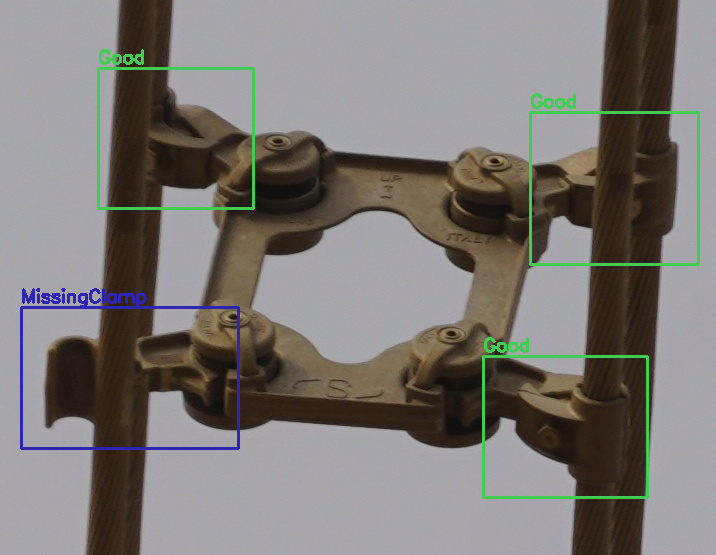

In [5]:
images, i = sorted(glob.glob("*.jpg")), 0
for img in tqdm(images):
  results = model(img)
  labels, cord_thres = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()
  imx = cv.imread(img,cv.COLOR_BGR2RGB)
  Y, X = imx.shape[0], imx.shape[1]
  for o in range(len(cord_thres)):
    x, y, w, h, t = int((cord_thres[o][0])*X), int((cord_thres[o][1])*Y), int((cord_thres[o][2])*X), int((cord_thres[o][3])*Y), int(labels[o])
    cv.rectangle(imx, (x, y), (w, h), (labelc[t]), 2)
    cv.putText(imx, str(labelx[t]), (x, y-5), cv.FONT_HERSHEY_SIMPLEX, 0.6, (labelc[t]), 2)
  cv2_imshow(imx)